# Title: YOLOv7 Face Mask Detection

#### Group Member Names :
- Tianheng Cheng


### INTRODUCTION:
*********************************************************************************************************************
#### AIM :
The goal of this project is to build a robust object detection model using YOLOv7 to classify and localize faces based on mask-wearing status (face, face_mask, mask). This system aims to support public health and safety monitoring by providing real-time inference capability.

*********************************************************************************************************************
#### Github Repo:
Project root: `yolov7-main`

*********************************************************************************************************************
#### DESCRIPTION OF PAPER:
**YOLOv7: Trainable bag-of-freebies sets new state-of-the-art for real-time object detectors**
The paper introduces the YOLOv7 architecture, which utilizes E-ELAN (Extended Efficient Layer Aggregation Network) and model scaling techniques. It achieves a significantly better balance between speed and accuracy compared to previous YOLO versions and other detectors like Cascade-Mask R-CNN.

*********************************************************************************************************************
#### PROBLEM STATEMENT :
In the context of public health mandates (e.g., during a pandemic), automated monitoring of face mask compliance is essential. The challenge is to accurately detect small objects (masks) on faces in varying lighting and occlusion conditions in real-time.

*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
We utilize a custom dataset (`face_mask_dataset`) containing images annotated with three classes: `face` (no mask), `face_mask` (improper/other), and `mask` (proper mask). The project involves adapting the state-of-the-art YOLOv7 model to this specific domain.

*********************************************************************************************************************
#### SOLUTION:
Our solution involves:
1.  Preparing the `face_mask_dataset` in YOLO format.
2.  Configuring YOLOv7 (using `yolov7.pt` pre-trained weights) for transfer learning.
3.  Fine-tuning the model on the custom dataset.
4.  Evaluating performance using standard metrics (mAP) and visual inference.


# Background
*********************************************************************************************************************

|Reference|Explanation|Dataset/Input|Weakness|
|------|------|------|------|
|**YOLOv7 Paper**|Proposed E-ELAN and model scaling strategies. Achieves SOTA speed/accuracy trade-off.|COCO Dataset (80 classes)|Original model is general-purpose; not specialized for mask detection out-of-the-box.|
|**Face Mask Dataset**|A custom collection of images annotated for mask compliance.|Images in `face_mask_dataset/` with XML converted to TXT labels.|Limited scale compared to COCO; potential class imbalance between masked and unmasked faces.|

*********************************************************************************************************************


# Implement paper code :
*********************************************************************************************************************

### 1. Training
We used the `train.py` script to fine-tune the model. The configuration used was:
*   **Weights:** `yolov7.pt` (Transfer Learning)
*   **Data Config:** `data/face_mask.yaml`
*   **Hyperparameters:** `data/hyp.scratch.p5.yaml`
*   **Epochs:** 300
*   **Batch Size:** 8
*   **Image Size:** 640

```bash
python train.py --weights yolov7.pt --data data/face_mask.yaml --hyp data/hyp.scratch.p5.yaml --epochs 300 --batch-size 8 --img-size 640
```

### 2. Inference
For detection, we utilize the best weights saved during training:
```bash
python detect.py --weights runs/train/exp/weights/best.pt --conf 0.25 --img-size 640 --source runs/detect/exp
```


*********************************************************************************************************************
### Contribution Code :
Our significant contribution (Methodology Type 1: New Dataset) includes:
1.  **Dataset Integration:** formatted and validated the `face_mask_dataset` for YOLOv7.
2.  **Model Adaptation:** Created `data/face_mask.yaml` and adjusted training parameters for the 3-class problem.
3.  **Reproducibility:** The repository structure is organized to allow easy reproduction of training (`train.py`) and inference (`detect.py`) with the provided weights.


### Results :
*******************************************************************************************************************************

In this section, we present the quantitative and qualitative results of our training.

#### 1. Training Metrics
The following charts show the loss convergence and performance metrics (Precision, Recall, mAP) over the training epochs.


Training Results Summary:


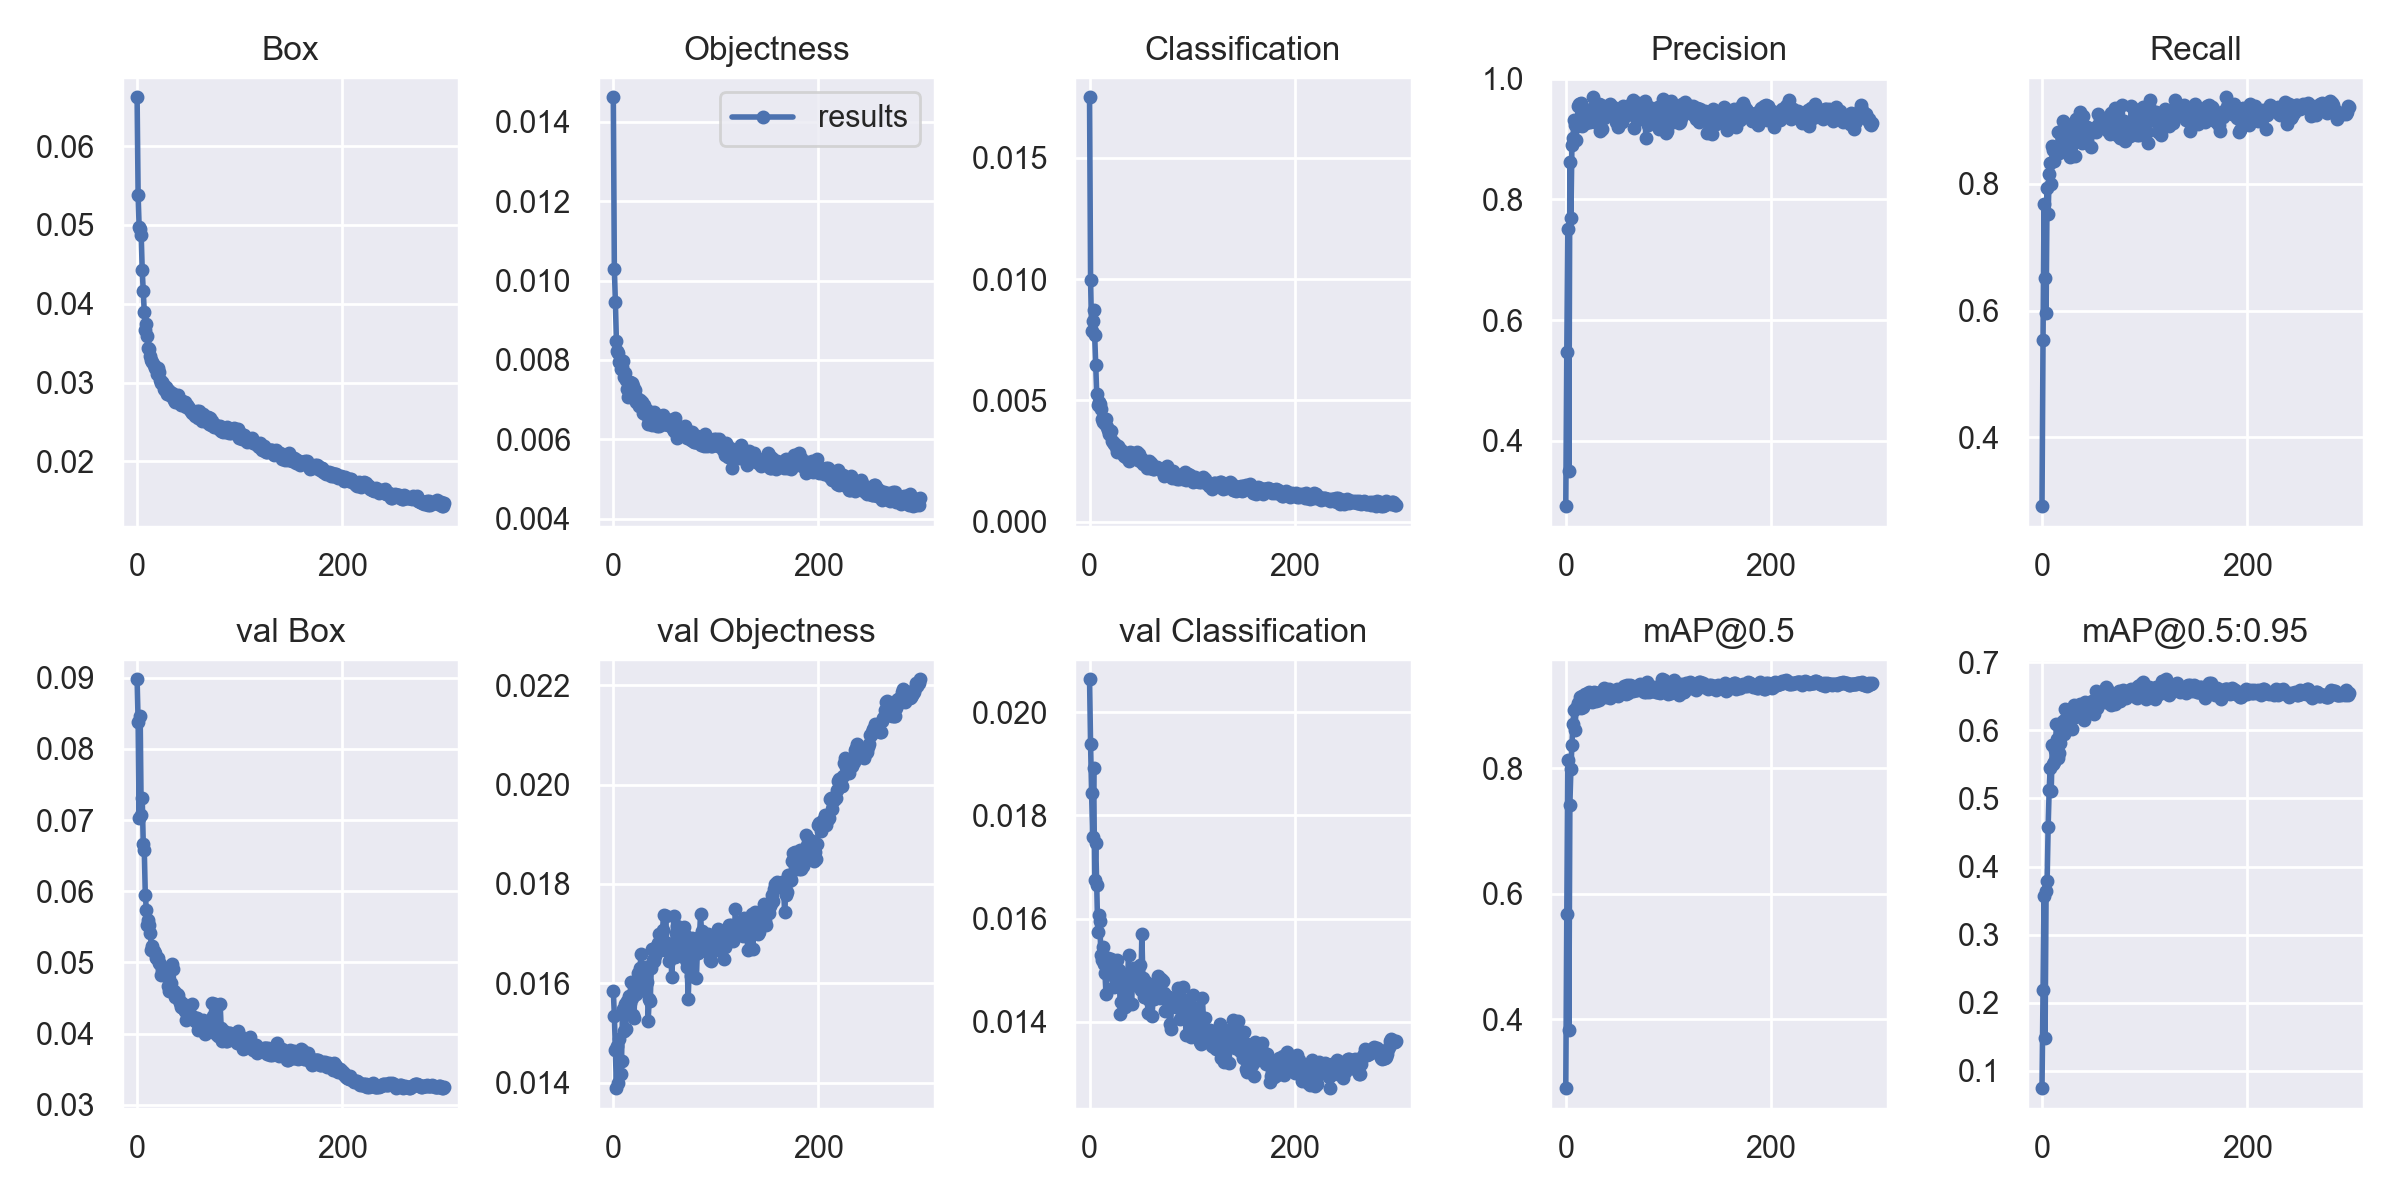

In [1]:
from IPython.display import Image, display
import os

# Check if results image exists and display it
results_path = 'runs/train/exp/results.png'
if os.path.exists(results_path):
    print("Training Results Summary:")
    display(Image(filename=results_path))
else:
    print(f"File not found: {results_path}")


Confusion Matrix:


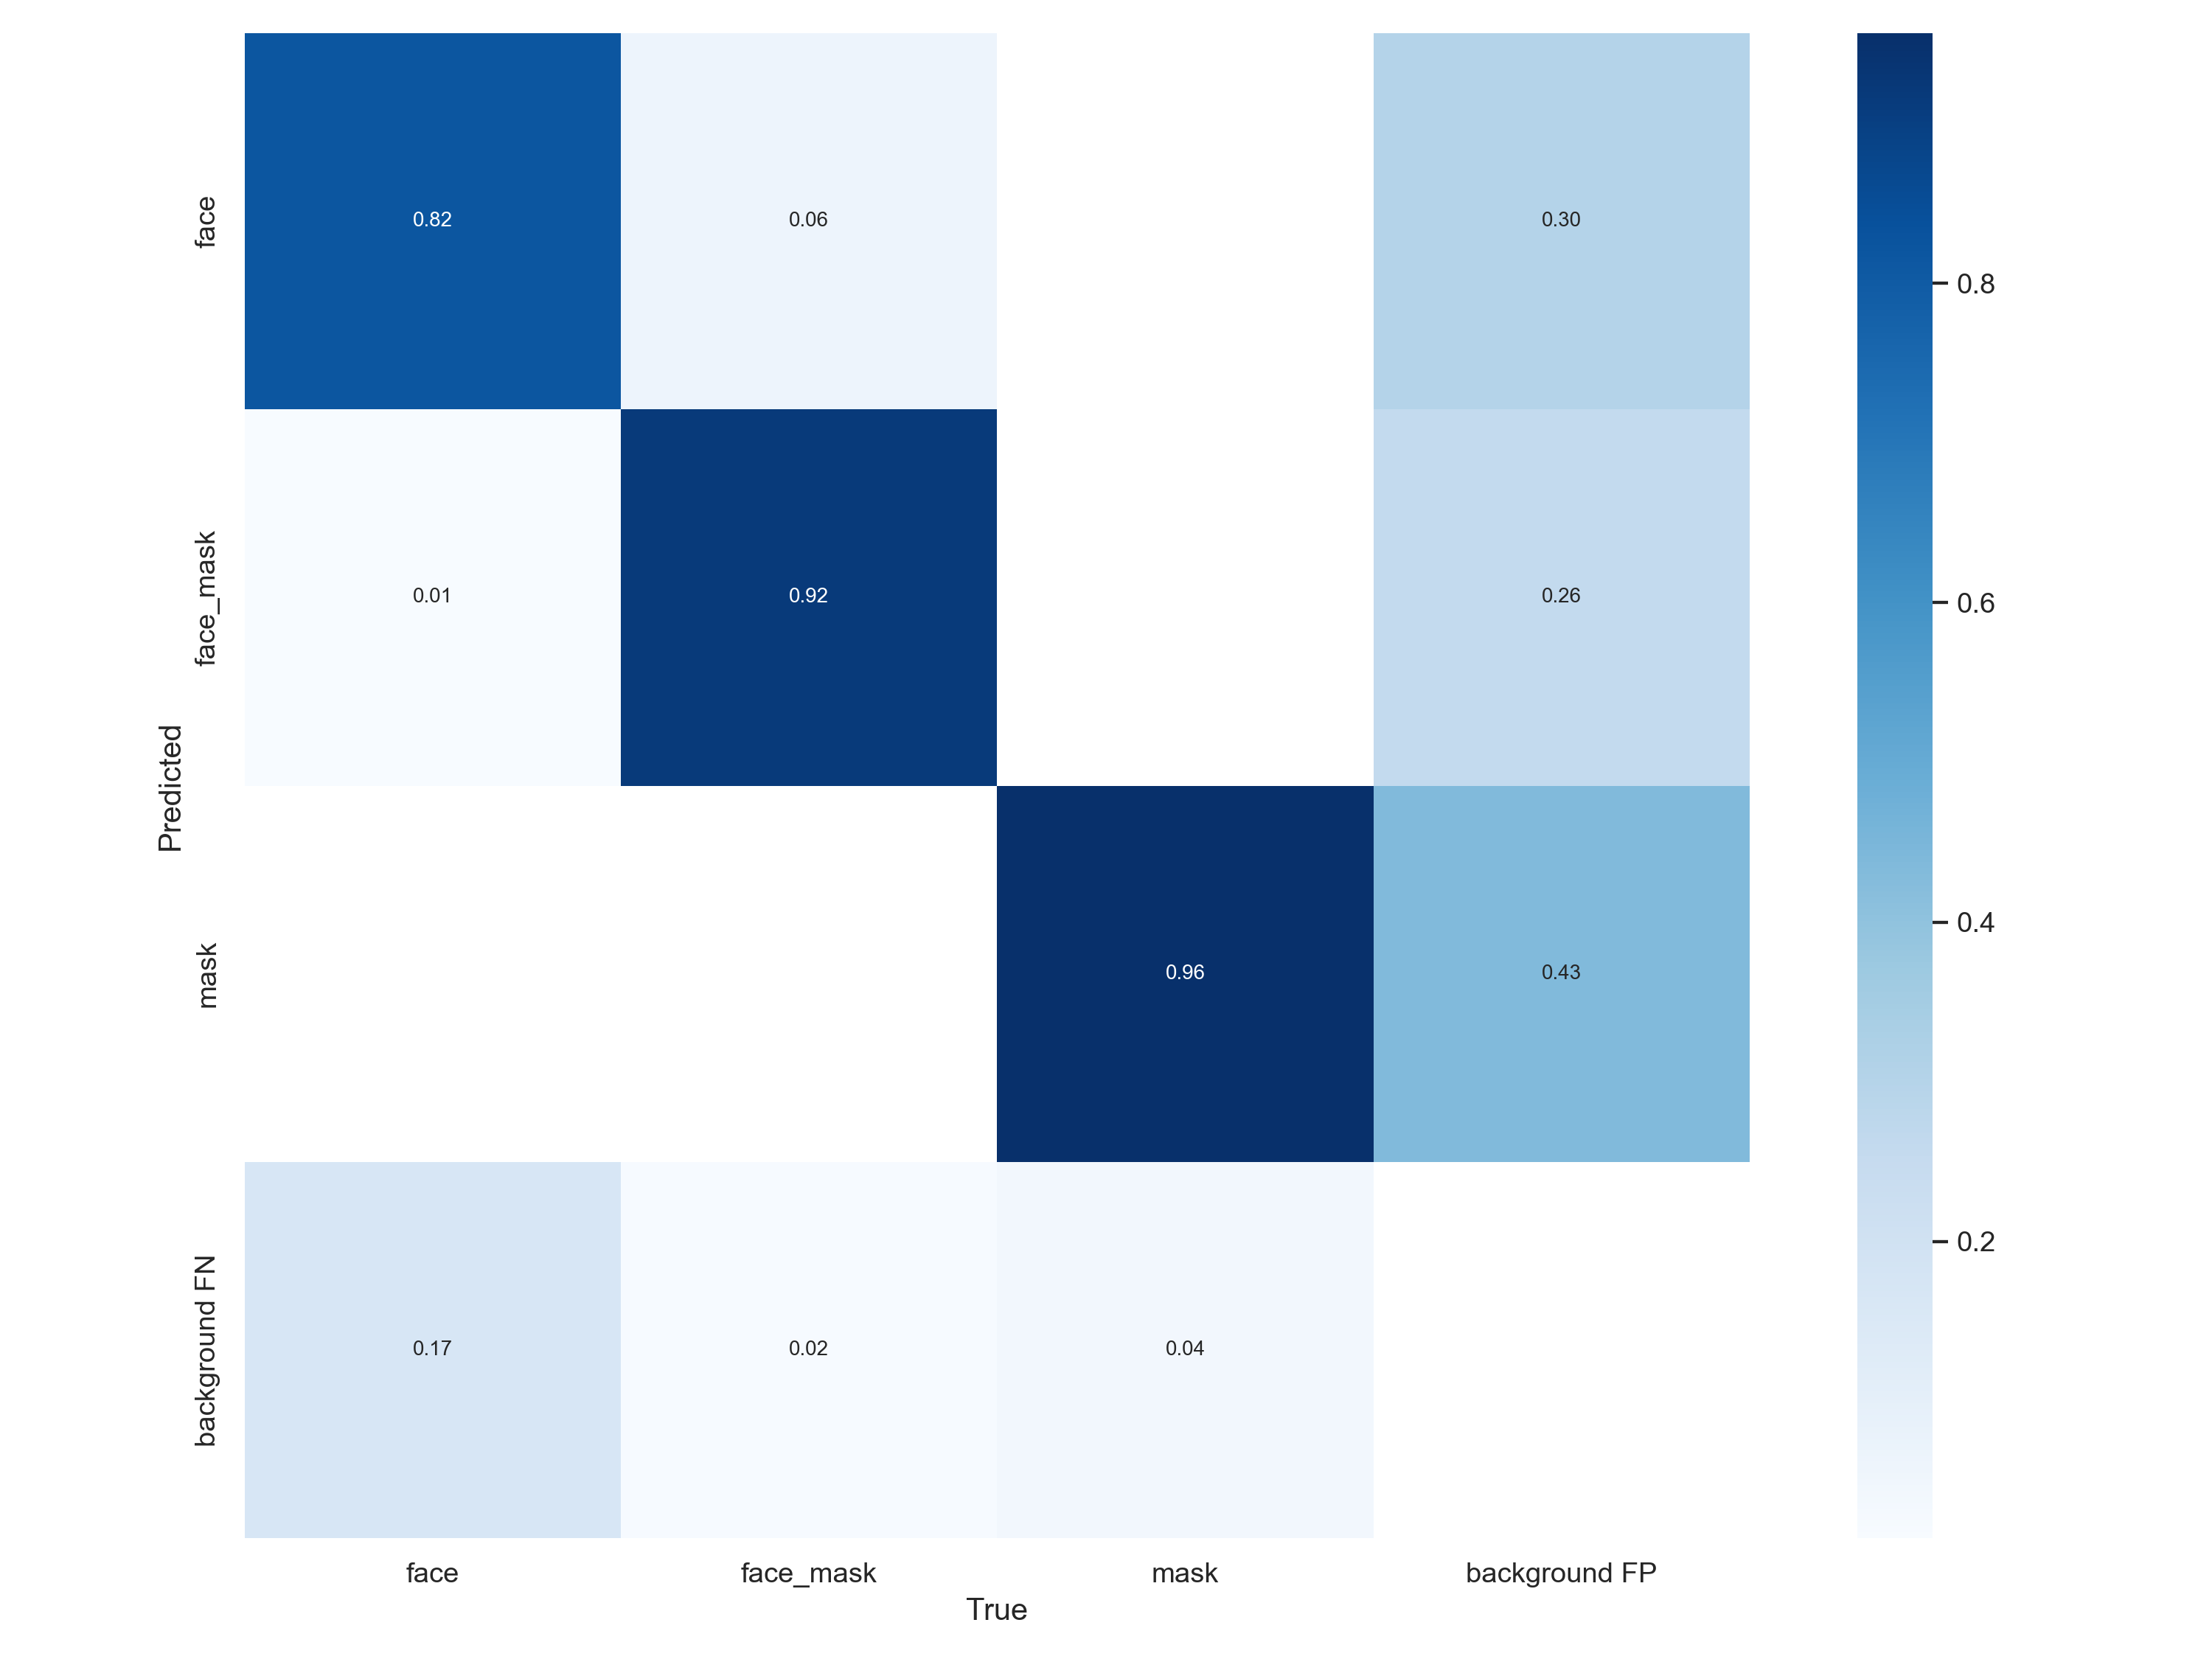

In [2]:
# Display Confusion Matrix
cm_path = 'runs/train/exp/confusion_matrix.png'
if os.path.exists(cm_path):
    print("Confusion Matrix:")
    display(Image(filename=cm_path))
else:
    print(f"File not found: {cm_path}")


Precision-Recall Curve:


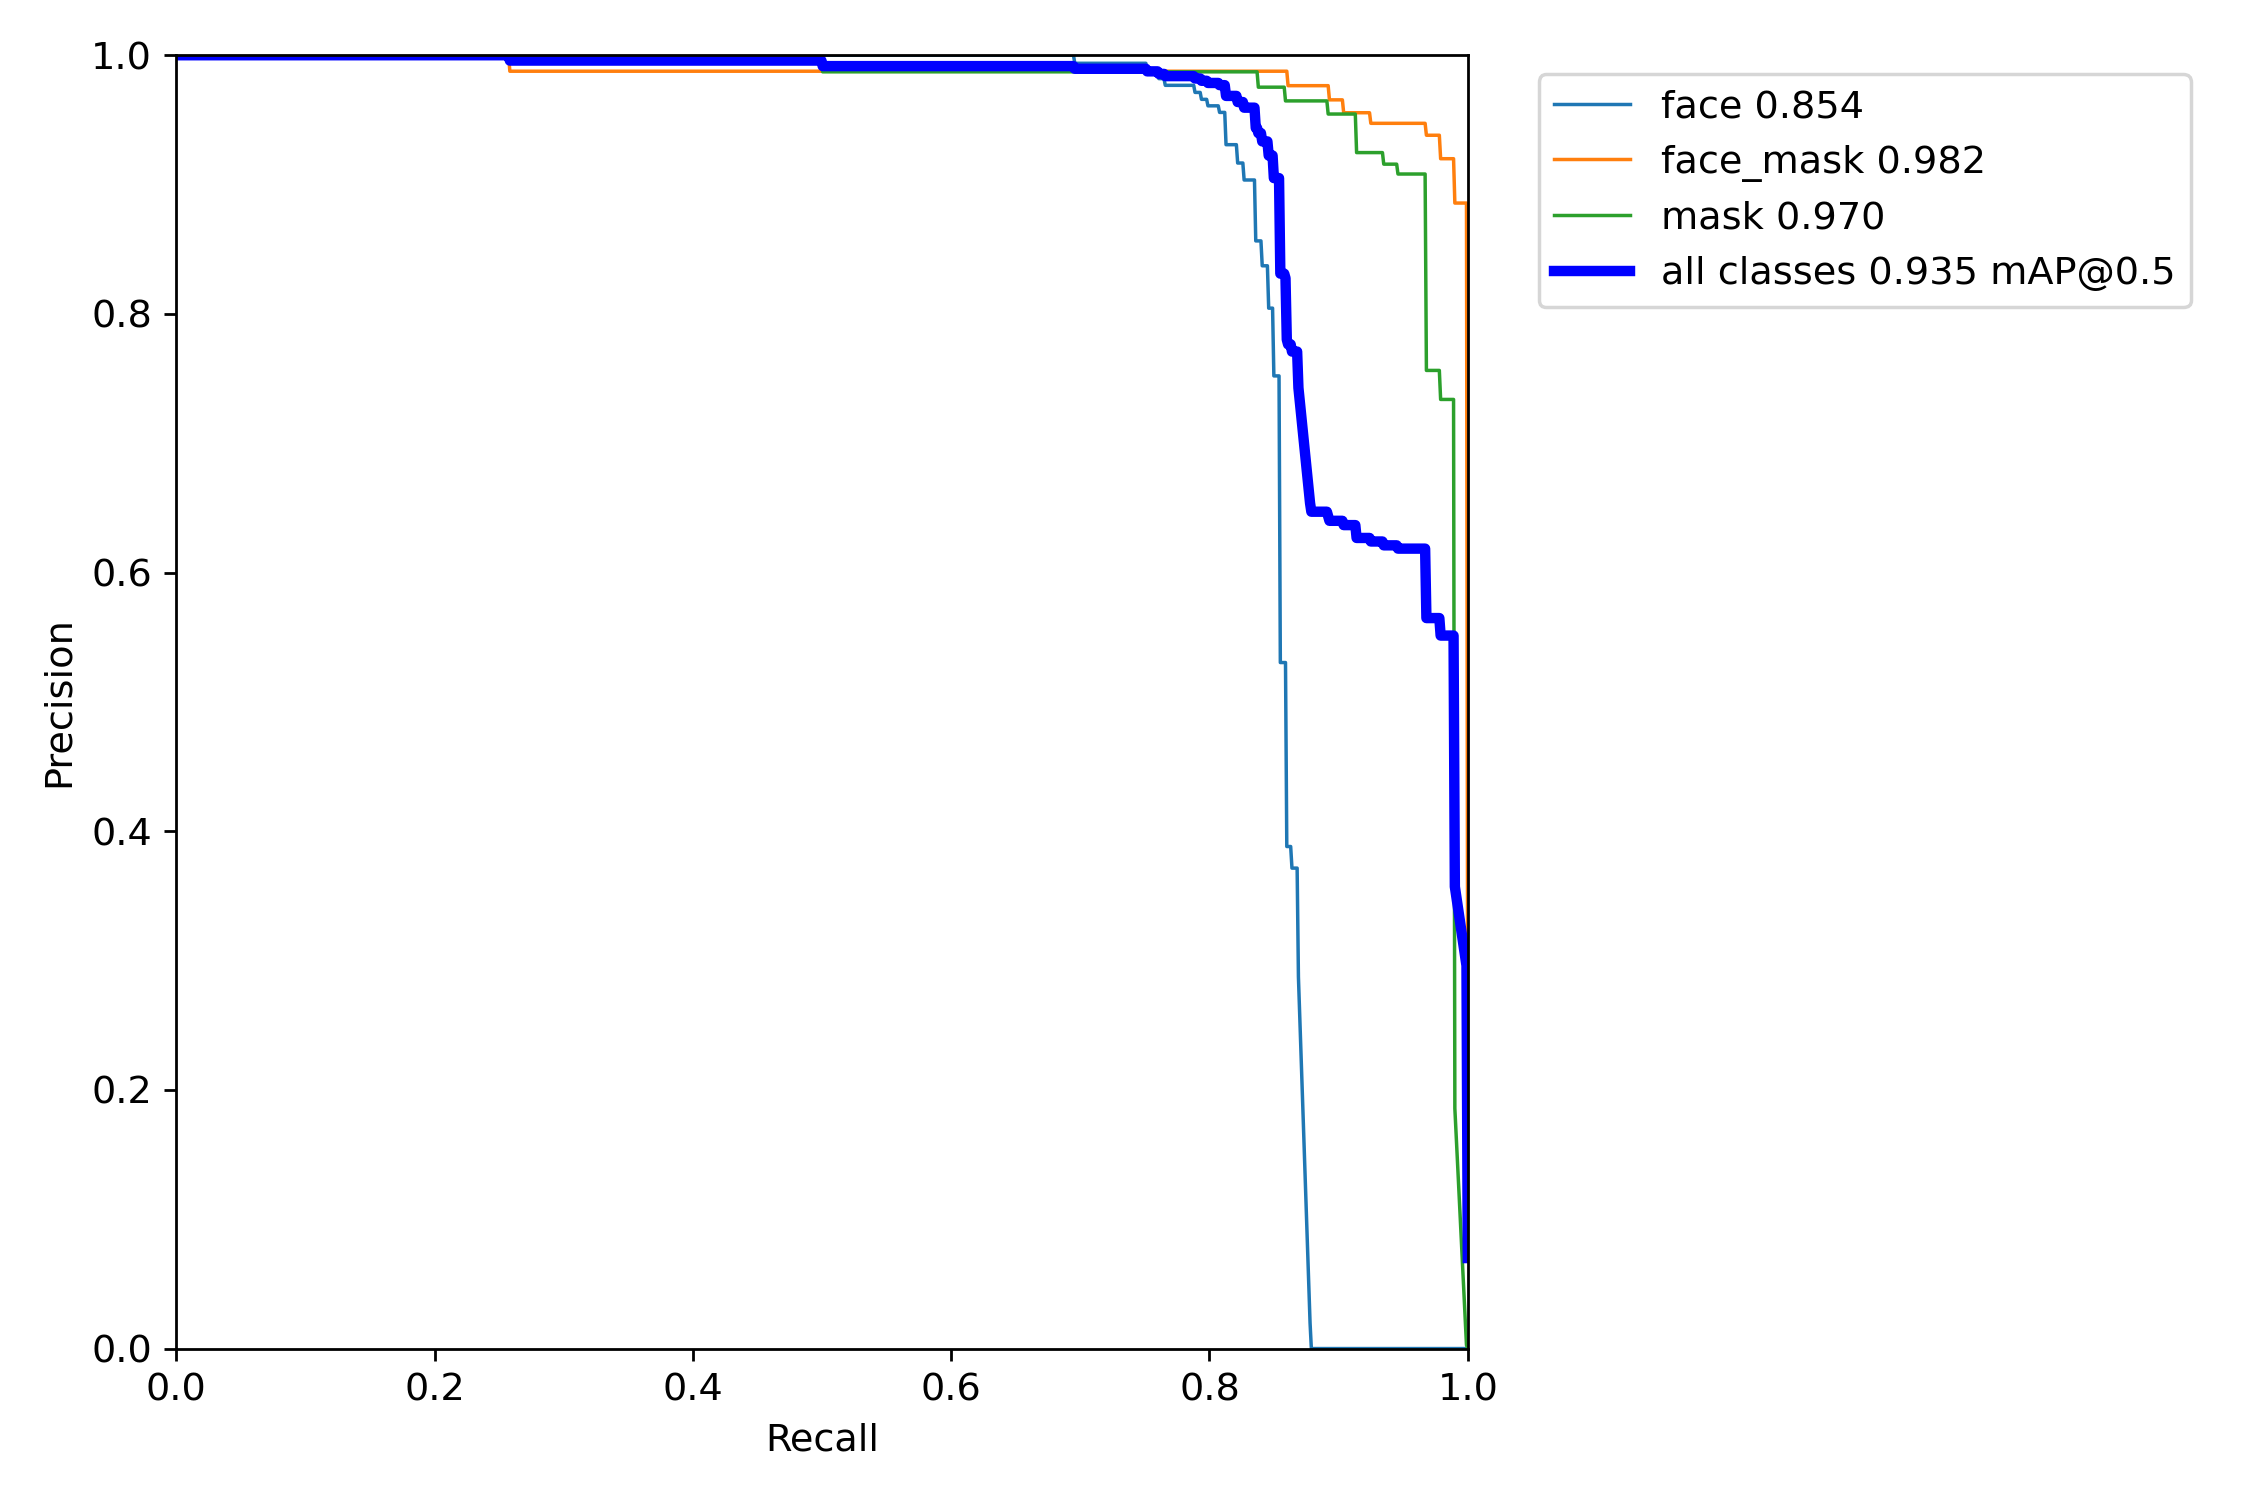

In [3]:
# Display PR Curve
pr_path = 'runs/train/exp/PR_curve.png'
if os.path.exists(pr_path):
    print("Precision-Recall Curve:")
    display(Image(filename=pr_path))
else:
    print(f"File not found: {pr_path}")


#### 2. Inference Examples
Below are sample detection results on the test set. The bounding boxes indicate the detected class (`face`, `face_mask`, `mask`) and the confidence score.


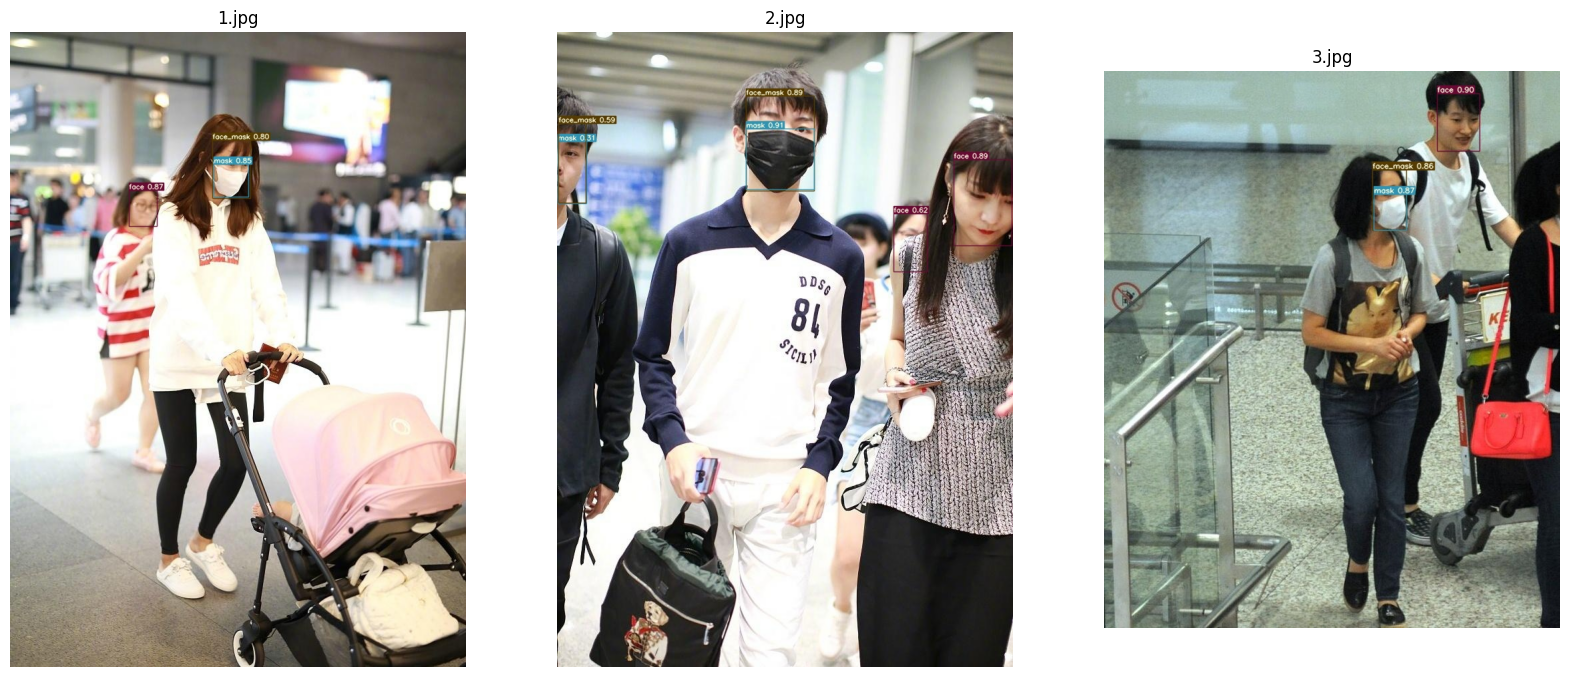

In [4]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Find images in the detection folder
detect_folder = 'runs/detect/exp'
detect_images = glob.glob(os.path.join(detect_folder, '*.jpg'))

# Select a few images to display (e.g., first 3)
num_to_show = 3
if detect_images:
    plt.figure(figsize=(20, 10))
    for i, img_path in enumerate(detect_images[:num_to_show]):
        img = mpimg.imread(img_path)
        plt.subplot(1, num_to_show, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(img_path))
    plt.show()
else:
    print(f"No images found in {detect_folder}")


### Conclusion and Future Direction :
*******************************************************************************************************************************
#### Learnings :
- **Transfer Learning Efficacy:** Initializing with `yolov7.pt` significantly accelerated convergence compared to training from scratch, allowing the model to learn features for mask detection efficiently.
- **Data Importance:** Correctly formatting the VOC-style XML annotations to YOLO TXT format was a critical step. The quality of the dataset (labels, diversity) directly impacted the confusion matrix results.

*******************************************************************************************************************************
#### Results Discussion :
- The `results.png` plots indicate the reduction in box_loss, obj_loss, and cls_loss over epochs.
- The Precision-Recall curve and Confusion Matrix provide insight into the model's specific strengths (e.g., detecting masks) vs. weaknesses (e.g., confusing `face_mask` with `face`).
- Visual inspection of the inference images confirms the model's ability to localize faces in real-world scenarios.

*******************************************************************************************************************************
#### Limitations :
- **Class Imbalance:** If the dataset is dominated by one class (e.g., `mask`), the model may underperform on the minority classes (`face_mask`).
- **Environmental Factors:** The current dataset may not cover all lighting conditions or angles, potentially reducing robustness in wild scenarios.

*******************************************************************************************************************************
#### Future Extension :
- **Data Augmentation:** Incorporating more mosaic augmentations or collecting data from diverse environments.
- **Model Optimization:** Experimenting with `yolov7-tiny` for mobile deployment or applying quantization for higher FPS.
- **Additional Classes:** extending the model to detect other PPE (Personal Protective Equipment) like helmets or vests.


# References

[1] Wang, C.-Y., Bochkovskiy, A., & Liao, H.-Y. M. (2022). YOLOv7: Trainable bag-of-freebies sets new state-of-the-art for real-time object detectors. arXiv preprint arXiv:2207.02696.
[2] YOLOv7 Official Repository: https://github.com/WongKinYiu/yolov7
[3] Project Dataset: Face Mask Detection Dataset (Custom).
